In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/animeshsrivastava/Downloads/candy-data.csv')
print('The dimension of our data is :',df.shape)

The dimension of our data is : (85, 12)


In [3]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercentile,pricepercentile
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511


In [4]:
df.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercentile     float64
pricepercentile     float64
dtype: object

In [5]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercentile     0
pricepercentile     0
dtype: int64

In [9]:
X = df.copy()
X.drop('competitorname', axis=1, inplace=True)
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercentile,pricepercentile
0,1,0,1,0,0,1,0,1,0,0.732,0.860
1,1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0,0.011,0.511
4,0,1,0,0,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116
81,0,1,0,0,0,0,1,0,0,0.093,0.116
82,0,1,0,0,0,0,0,0,1,0.313,0.313
83,0,0,1,0,0,0,1,0,0,0.186,0.267


In [10]:
y = X['chocolate']
X.drop(['chocolate'], axis=1, inplace=True)
X

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercentile,pricepercentile
0,0,1,0,0,1,0,1,0,0.732,0.860
1,0,0,0,1,0,0,1,0,0.604,0.511
2,0,0,0,0,0,0,0,0,0.011,0.116
3,0,0,0,0,0,0,0,0,0.011,0.511
4,1,0,0,0,0,0,0,0,0.906,0.511
...,...,...,...,...,...,...,...,...,...,...
80,1,0,0,0,0,0,0,0,0.220,0.116
81,1,0,0,0,0,1,0,0,0.093,0.116
82,1,0,0,0,0,0,0,1,0.313,0.313
83,0,1,0,0,0,1,0,0,0.186,0.267


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)

# LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred = LR.predict(X_test)

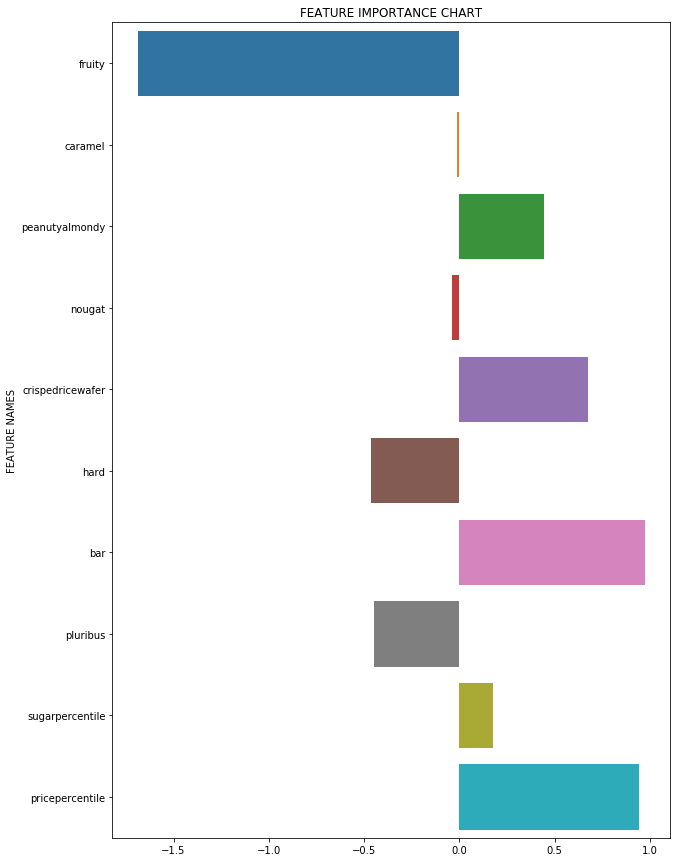

In [17]:
plt.figure(figsize=(10,15))
sns.barplot(x=LR.coef_[0], y=X.columns)
plt.title('FEATURE IMPORTANCE CHART')
plt.ylabel('FEATURE NAMES')
plt.show()

In [72]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8846153846153846


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.77      0.87        13

    accuracy                           0.88        26
   macro avg       0.91      0.88      0.88        26
weighted avg       0.91      0.88      0.88        26



In [25]:
print(confusion_matrix(y_test, y_pred))

[[13  0]
 [ 3 10]]


In [74]:
from sklearn.metrics import r2_score
print('R2 score:',r2_score(y_test.values,y_pred))

R2 score: 0.5384615384615384


# DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train.values,y_train.values)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [30]:
y_pred_DT = DT.predict(X_test)

In [34]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

Accuracy: 0.8076923076923077


In [37]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.90      0.69      0.78        13

    accuracy                           0.81        26
   macro avg       0.82      0.81      0.81        26
weighted avg       0.83      0.81      0.81        26



In [75]:
print('R2 score:',r2_score(y_test.values,y_pred_DT))

R2 score: 0.23076923076923073


# RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(X_train.values,y_train.values)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [35]:
y_pred_rf = rf.predict(X_test)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf.round()))

Accuracy: 0.9615384615384616


In [42]:
print(classification_report(y_test, y_pred_rf.round()))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        13

    accuracy                           0.96        26
   macro avg       0.96      0.96      0.96        26
weighted avg       0.96      0.96      0.96        26



In [76]:
print('R2 score:',r2_score(y_test.values,y_pred_rf))

R2 score: 0.785623076923077


# GRADIENT BOOSTING

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=5000,random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
y_pred_gbr = gbr.predict(X_test)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbr.round()))

Accuracy: 0.8846153846153846


In [52]:
print(classification_report(y_test,y_pred_gbr.round()))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.92      0.85      0.88        13

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26



In [77]:
print('R2 score:',r2_score(y_test.values,y_pred_gbr))

R2 score: 0.5772187568770759


# NEURAL NETWORK

# SOLVER - lbfgs

In [57]:
from sklearn.neural_network import MLPClassifier

In [59]:
clf = MLPClassifier(random_state=42, solver='lbfgs')
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [60]:
y_pred_clf = clf.predict(X_test)

In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf.round()))

Accuracy: 0.8461538461538461


In [61]:
print(classification_report(y_test,y_pred_clf.round()))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.85      0.85      0.85        13

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26



In [78]:
print('R2 score:',r2_score(y_test.values,y_pred_clf))

R2 score: 0.3846153846153846


# SOLVER - SGD

In [63]:
clf1 = MLPClassifier(random_state=42, solver='sgd')
clf1.fit(X_train, y_train)

/Users/animeshsrivastava/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [64]:
y_pred_clf1 = clf1.predict(X_test)

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_clf1.round()))

Accuracy: 0.8461538461538461


In [65]:
print(classification_report(y_test,y_pred_clf1.round()))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.69      0.82        13

    accuracy                           0.85        26
   macro avg       0.88      0.85      0.84        26
weighted avg       0.88      0.85      0.84        26



In [79]:
print('R2 score:',r2_score(y_test.values,y_pred_clf1))

R2 score: 0.3846153846153846
